# Credit Card Defaulters Prediction

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.10.0'

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
import itertools

In [7]:
tw_data = pd.read_csv("creditcarddefault.csv")

In [8]:
tw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
tw_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
tw_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
tw_data.shape

(30000, 25)

In [12]:
tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
# removing the customer id and name and saving the dependent variables in x
x = tw_data.iloc[:,1:24].values

# saving the independent variable in y
y = tw_data.iloc[:,24].values

print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [14]:
x.shape

(30000, 23)

In [15]:
# splitting the data set into train and test using train_test_split library for cross validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [16]:
# scaling the data using the preprocessing library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

# Model Building Using Keras
We have so far understood the data and made some preprocessing on the data in order to make the data suitable for our model. Now that are data is ready to be trained let us build our first keras model.


In [18]:
# importing required modules from keras

from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Step 1: initializing our model
class_model = Sequential()

In [20]:
# Step 2: Adding the layers to our NN.
# -> In this we add one I/P layer (which are the IPS directly), multiple hidden layers and 1 O/P layer.
# -> As there are 23 input variables there will be 23 nodes in the input layer. 
# -> Nodes in the hidden there is free to our choice, however to have an optimum error 
# -> We can calculate the nodes in our first hidden layer to be (I/P nodes + 1) / 2 = (23 + 1)/ 2 = 12

# -> While initializing random weights to the NN, we pass the vlaue to the hyperparameter init as "UNIFORM"
# -> UNIFORM will ensure that the weights are given uniformly random and close to 0

# -> Also we should be specifying what activation function to be used. Let us use RELU in our model here 

# 1st HIDDEN LAYER
class_model.add(Dense(24, input_dim = 23, activation = "relu"))

# 2nd HIDDEN LAYER
# as the input dim to this layer is the output from the previous layer 
# we need not explicitly specify it here 
class_model.add(Dense(12, activation = "relu"))

# OUTPUT LAYER
# sigmoid activation is used to get the output between 0 and 1.
class_model.add(Dense(1, activation = "sigmoid"))

In [21]:
class_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                576       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Step 3: Compiling the neural network
# In this step we have the liberty to choose the optimization method we would like to use
# the loss function and the metrics that we require output
# binary_crossentropy loss function used when a binary output is expected

class_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
# Step 4: Fitting the model

class_model.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
2100/2100 [==============================] - 7s 1ms/step - loss: 0.4736 - accuracy: 0.8033
Epoch 2/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4435 - accuracy: 0.8165
Epoch 3/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4368 - accuracy: 0.8183
Epoch 4/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4336 - accuracy: 0.8192
Epoch 5/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4314 - accuracy: 0.8199
Epoch 6/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4303 - accuracy: 0.8209
Epoch 7/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4285 - accuracy: 0.8206
Epoch 8/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4268 - accuracy: 0.8200
Epoch 9/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4258 - accuracy: 0.8223
Epoch 10/100
2100/2100 [==============================] - 2s 1ms/step - l

2100/2100 [==============================] - 2s 1ms/step - loss: 0.4045 - accuracy: 0.8267
Epoch 80/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4039 - accuracy: 0.8265
Epoch 81/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4036 - accuracy: 0.8268
Epoch 82/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4040 - accuracy: 0.8280
Epoch 83/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4036 - accuracy: 0.8280
Epoch 84/100
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4035 - accuracy: 0.8279
Epoch 85/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4034 - accuracy: 0.8272
Epoch 86/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4033 - accuracy: 0.8278
Epoch 87/100
2100/2100 [==============================] - 2s 1ms/step - loss: 0.4027 - accuracy: 0.8288
Epoch 88/100
2100/2100 [==============================] - 3s 1ms/step - loss:

In [28]:
# Step 5: Predicting the result for the test data

y_pred = class_model.predict(x_test)

282/282 [==============================] - 3s 986us/step


In [29]:
y_pred

array([[0.2757109 ],
       [0.04824891],
       [0.09008387],
       ...,
       [0.01904537],
       [0.4543127 ],
       [0.18311828]], dtype=float32)

In [30]:
# As the values are the probability we may need to set up a threshold to find the actual values

pred = (y_pred > 0.5)

In [36]:
target_names = ["no", "yes"]
def plot_confusion_mat(cm, classes, 
                       normalize = False, 
                       title = "Confusion Matrix", cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize = True.
    """
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matri, without normalization")
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True")
        plt.xlabel("Predicted")

Confusion matri, without normalization
[[6584  396]
 [1324  696]]


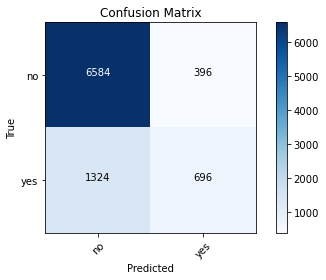

In [37]:
# formulating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_mat(cm, classes = target_names, normalize = False)
plt.show()

In [38]:
# Evaluating the Model

scores = class_model.evaluate(x_test, y_test)

print("\nACCURACY: %.2f%%" % (scores[1]*100))

282/282 [==============================] - 3s 1ms/step - loss: 0.4579 - accuracy: 0.8089

ACCURACY: 80.89%


# Conclusion
Thus we have built our first model with Keras with 81% accuracy.